In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np # for multidimensional arrays

In [0]:
# Constants
INPUT_WIDTH = 25

# Word index
word_index = {}
word_index["<PAD>"] = 0
word_index["<VALUE UP>"] = 1
word_index["<VALUE DOWN>"] = 2
word_index["<STRING CHANGE>"] = 3
word_index["<CHILD CHANGE>"] = 4
word_index["<NUMBER CHANGE>"] = 5
word_index["<UNKNOWN>"] = 6
word_index["."] = 7
word_index["entry"] = 8
word_index["document"] = 9
word_index["validationxml"] = 10
word_index["browserxml"] = 11
word_index["arrangement"] = 12
word_index["text()"] = 13
word_index["@label"] = 14
word_index["@chronoid"] = 15
word_index["@type"] = 16
word_index["@rtti"] = 17
word_index["base"] = 18
word_index["dlitem"] = 19
word_index["node"] = 20
word_index["member"] = 21
word_index["displayxml"] = 22
word_index["sheets"] = 23
word_index["sheet"] = 24
word_index["root"] = 25
word_index["@Y"] = 26
word_index["attr"] = 27
word_index["textstylemanager"] = 28
word_index["textstyle"] = 29
word_index["Entry"] = 30
word_index["@X"] = 31
word_index["renderstylexml"] = 32
word_index["bodychecksum"] = 33
word_index["bodychecksumxml"] = 34
word_index["executablexml"] = 35
word_index["BrowInfo"] = 36
word_index["transform"] = 37
word_index["primattrstack"] = 38
word_index["primattr"] = 39
word_index["renderstyletable"] = 40
word_index["style"] = 41
word_index["attributesxml"] = 42
word_index["attributesets"] = 43
word_index["attributeset"] = 44
word_index["attribute"] = 45
word_index["occurrence"] = 46
word_index["@style"] = 47
word_index["feaxml"] = 48
word_index["fearesults"] = 49
word_index["simulationresults"] = 50
word_index["resultsummary"] = 51
word_index["RelativeReactionForces"] = 52
word_index["constraintReactionForce"] = 53
word_index["@maxComponent"] = 54
word_index["propertiesxml"] = 55
word_index["propertysets"] = 56
word_index["propertyset"] = 57
word_index["property"] = 58
word_index["@value"] = 59
word_index["EndTreatments"] = 60
word_index["EndTreatment"] = 61
word_index["Lengthen"] = 62
word_index["workgeometryxml"] = 63
word_index["workplanes"] = 64
word_index["@blue"] = 65
word_index["@green"] = 66
word_index["@red"] = 67
word_index["@ambient"] = 68
word_index["@diffuse"] = 69
word_index["@internalname"] = 70
word_index["definitiondata"] = 71
word_index["testingaddin"] = 72
word_index["apixml"] = 73
word_index["assemblychecksumxml"] = 74
word_index["component"] = 75
word_index["bodyoverrides"] = 76
word_index["bodyoverride"] = 77
word_index["@count"] = 78
word_index["FDesign"] = 79
word_index["Object"] = 80
word_index["Calc"] = 81
word_index["thl"] = 82
word_index["@Val"] = 83
word_index["dcxml"] = 84
word_index["features"] = 85
word_index["feature"] = 86
word_index["@health"] = 87
word_index["@Z"] = 88

# Train data
train_data_raw = []; train_labels = []; train_ids = []
train_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 19, 18, 37, 38, 39, 21, 67]);                         train_labels.append(0); train_ids.append("dm_at_appendfilenameinviewblockname_0004#2")
train_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 19, 18, 37, 38, 39, 21, 66]);                         train_labels.append(0); train_ids.append("dm_at_appendfilenameinviewblockname_0004#1")
train_data_raw.append([3, 1, 7, 10, 9, 74, 75, 76, 77, 33, 13]);                                                        train_labels.append(0); train_ids.append("feat_807811#0")
train_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 21, 26]);                         train_labels.append(0); train_ids.append("907031#1")
train_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 19, 18, 37, 38, 39, 21, 65]);                         train_labels.append(0); train_ids.append("dm_at_appendfilenameinviewblockname_0004#0")
train_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 14]);                                                              train_labels.append(1); train_ids.append("break link_catia_part1#1")
train_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 19, 21, 26]);                     train_labels.append(0); train_ids.append("tc5356#5")
train_data_raw.append([4, 1, 7, 10, 72, 73]);                                                                           train_labels.append(0); train_ids.append("colorschemescoll_001#0")
train_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 18, 27, 27, 28, 29, 21, 21, 13]);                 train_labels.append(0); train_ids.append("idw_etsy_d1207#0")
train_data_raw.append([5, 1, 7, 10, 9, 42, 43, 44, 45, 60, 61, 62, 13]);                                                train_labels.append(0); train_ids.append("curvedframe_trimtoframe_spline#0")
train_data_raw.append([3, 1, 7, 10, 9, 34, 33, 13]);                                                                    train_labels.append(0); train_ids.append("bug116303#0")
train_data_raw.append([4, 1, 7, 10, 35, 36, 30, 30, 30, 30, 30, 30, 30]);                                               train_labels.append(0); train_ids.append("md_mbs_c1213#0")
train_data_raw.append([3, 1, 7, 10, 9, 48, 49, 50, 51, 52, 53, 54]);                                                    train_labels.append(0); train_ids.append("cylinder-30x1000x1500n#0")
train_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 21, 26]);                         train_labels.append(0); train_ids.append("tc5356#0")
train_data_raw.append([3, 1, 7, 10, 9, 55, 56, 57, 58, 59]);                                                            train_labels.append(0); train_ids.append("curvedframe_trimtoframe_arc#0")
train_data_raw.append([4, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 18, 19, 19, 19, 19, 19]);                 train_labels.append(0); train_ids.append("idw_replacemodelreference_c1102#0")
train_data_raw.append([3, 1, 7, 10, 9, 32, 46, 47]);                                                                    train_labels.append(0); train_ids.append("windshield wiper#6")
train_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 14]);                                                              train_labels.append(1); train_ids.append("bimcompexptbuildingcompmtd_002#0")
train_data_raw.append([4, 1, 7, 10, 9, 63, 64]);                                                                        train_labels.append(0); train_ids.append("parker union tee 164ca-264ca 164ca-2#1")
train_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 14]);                                                           train_labels.append(1); train_ids.append("break link_catia_part1#0")
train_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 15]);                                                        train_labels.append(1); train_ids.append("tp_change_diameter#0")
train_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 21, 31]);                         train_labels.append(0); train_ids.append("907031#10")
train_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8]);                                                         train_labels.append(1); train_ids.append("rt_core cavity design_1170823#0")
train_data_raw.append([4, 1, 7, 10, 35, 36, 30, 30, 30, 30, 30]);                                                       train_labels.append(0); train_ids.append("md_mbs_c1213#3")
train_data_raw.append([3, 2, 7, 10, 9, 32, 40, 41, 68]);                                                                train_labels.append(0); train_ids.append("windshield wiper#0")
train_data_raw.append([3, 2, 7, 10, 9, 32, 40, 41, 69]);                                                                train_labels.append(0); train_ids.append("windshield wiper#1")
train_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 15]);                                                        train_labels.append(1); train_ids.append("tp_flip_orientation#0")
train_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 14]);                                                        train_labels.append(1); train_ids.append("tp_flip_orientation#2")
train_data_raw.append([5, 2, 7, 10, 9, 42, 43, 44, 45, 79, 80, 81, 82, 83]);                                            train_labels.append(0); train_ids.append("dac_chains_calc_10201020#0")
train_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8]);                                                               train_labels.append(1); train_ids.append("rt_core cavity design_1170823#2")
train_data_raw.append([3, 1, 7, 10, 9, 32, 40, 41, 70]);                                                                train_labels.append(0); train_ids.append("windshield wiper#2")
train_data_raw.append([5, 1, 7, 10, 9, 63, 64, 78]);                                                                    train_labels.append(0); train_ids.append("parker union tee 164ca-264ca 164ca-2#0")
train_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 15]);                                                              train_labels.append(1); train_ids.append("break link_catia_part1#3")
train_data_raw.append([3, 1, 7, 10, 9, 84, 85, 86, 87]);                                                                train_labels.append(0); train_ids.append("smmsb_createpunch#0")
train_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 21, 31]);                         train_labels.append(0); train_ids.append("592453#0")
train_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 18, 19, 19, 19, 19, 19, 19, 21, 88]);     train_labels.append(0); train_ids.append("dm_migr_r11_coolingtower#0")
train_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8]);                                                                  train_labels.append(1); train_ids.append("5456_moveeop#0")

# Validation data
validation_data_raw = []; validation_labels = []; validation_ids = []
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8]);                                                                  validation_labels.append(1); validation_ids.append("5456_moveeop#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 14]);                                                              validation_labels.append(1); validation_ids.append("bimcompexptbuildingcompmtd_002#0")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 15]);                                                        validation_labels.append(1); validation_ids.append("tp_change_diameter#0")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 15]);                                                        validation_labels.append(1); validation_ids.append("tp_flip_orientation#0")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 14]);                                                        validation_labels.append(1); validation_ids.append("tp_flip_orientation#2")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8]);                                                         validation_labels.append(1); validation_ids.append("rt_core cavity design_1170823#0")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8]);                                                               validation_labels.append(1); validation_ids.append("rt_core cavity design_1170823#2")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 14]);                                                           validation_labels.append(1); validation_ids.append("break link_catia_part1#0")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 14]);                                                              validation_labels.append(1); validation_ids.append("break link_catia_part1#1")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 15]);                                                              validation_labels.append(1); validation_ids.append("break link_catia_part1#3")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 17]);                                                              validation_labels.append(1); validation_ids.append("break link_catia_part1#5")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8]);                                                                  validation_labels.append(1); validation_ids.append("break link_catia_part1#6")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8]);                                                                     validation_labels.append(1); validation_ids.append("break link_proe_part1#0")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8]);                                                            validation_labels.append(1); validation_ids.append("copy_paste_part#1")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 14]);                                                     validation_labels.append(1); validation_ids.append("copy_paste_part#2")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 14]);                                                  validation_labels.append(1); validation_ids.append("copy_paste_part#4")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8]);                                                      validation_labels.append(1); validation_ids.append("copy_paste_part#5")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 14]);                                               validation_labels.append(1); validation_ids.append("copy_paste_part#6")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8]);                                                   validation_labels.append(1); validation_ids.append("copy_paste_part#7")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 14]);                                                           validation_labels.append(1); validation_ids.append("bug106347#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 14]);                                                  validation_labels.append(1); validation_ids.append("bug109424#6")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 15]);                                                           validation_labels.append(1); validation_ids.append("bug117219#0")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8, 8]);                                                               validation_labels.append(1); validation_ids.append("bug117664_1#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 14]);                                                        validation_labels.append(1); validation_ids.append("bug118455#1")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 14]);                                               validation_labels.append(1); validation_ids.append("dwg_crosspartproject#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 14]);                                                     validation_labels.append(1); validation_ids.append("dwg_crosspartproject#34")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 15]);                                                              validation_labels.append(1); validation_ids.append("futureanycad_update_catia_assembly6#17")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8]);                                                                     validation_labels.append(1); validation_ids.append("futureanycad_update_swx_part1#0")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 15]);                                                           validation_labels.append(1); validation_ids.append("futurecad_derive_part-dv-update#0")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8]);                                                validation_labels.append(1); validation_ids.append("localsave_catia_2#112")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                                            validation_labels.append(1); validation_ids.append("localsave_nx_2#59")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                                            validation_labels.append(1); validation_ids.append("localsave_nx_2#63")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                                         validation_labels.append(1); validation_ids.append("localsave_nx_2#123")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                                         validation_labels.append(1); validation_ids.append("localsave_nx_2#127")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8]);                                                            validation_labels.append(1); validation_ids.append("localsave_nx_2#362")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                                validation_labels.append(1); validation_ids.append("selective_catia_assembly8#1")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                             validation_labels.append(1); validation_ids.append("selective_catia_assembly8#2")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]);                                       validation_labels.append(1); validation_ids.append("selective_catia_assembly8#3")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                                   validation_labels.append(1); validation_ids.append("selective_catia_assembly8#4")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                          validation_labels.append(1); validation_ids.append("selective_catia_assembly8#5")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                       validation_labels.append(1); validation_ids.append("selective_catia_assembly8#6")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]);                                 validation_labels.append(1); validation_ids.append("selective_catia_assembly8#7")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14]);                                      validation_labels.append(1); validation_ids.append("selective_catia_assembly8#10")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 16]);                                                                 validation_labels.append(1); validation_ids.append("createtextboxconstraintproxy_001#0")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 13]);                                                                 validation_labels.append(1); validation_ids.append("createtextboxconstraintproxy_001#1")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 13]);                                                                 validation_labels.append(1); validation_ids.append("createtextboxconstraintproxy_001#2")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 17]);                                                           validation_labels.append(1); validation_ids.append("skipallunresolvedwarnings_001#2")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 17]);                                                     validation_labels.append(1); validation_ids.append("skipallunresolvedwarnings_001#4")
validation_data_raw.append([4, 1, 7, 10, 9, 11, 12, 8, 13]);                                                                 validation_labels.append(1); validation_ids.append("translatoraddinsavecopyas_001#2")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 13]);                                                                 validation_labels.append(1); validation_ids.append("testsmeasuretoolsgetlooplength_001#1")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 17]);                                                           validation_labels.append(1); validation_ids.append("additionaldisplaysettings_ipn#4")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 17]);                                                                 validation_labels.append(1); validation_ids.append("part_ps_delete#0")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 15]);                                                  validation_labels.append(1); validation_ids.append("asmb_conn_1483947#10")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 15]);                                                     validation_labels.append(1); validation_ids.append("mirrorcopyoffsetoriginwithrefer#7")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 14]);                                                                 validation_labels.append(1); validation_ids.append("tfs_147642#0")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 14]);                                                                 validation_labels.append(1); validation_ids.append("tfs_151789#0")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 15]);                                                     validation_labels.append(1); validation_ids.append("cm_smoke_ipartcolor#5")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 15]);                                               validation_labels.append(1); validation_ids.append("cm_smoke_molddesign#1")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 15]);                                            validation_labels.append(1); validation_ids.append("cm_smoke_molddesign#21")
validation_data_raw.append([4, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 18, 19, 19, 19, 19, 19, 19, 21, 71, 21]); validation_labels.append(1); validation_ids.append("bug_168114#0")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 17]);                                                              validation_labels.append(1); validation_ids.append("translator_jtexportoption_006#4")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8]);                                                         validation_labels.append(1); validation_ids.append("invalidpath#8")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 15]);                                                  validation_labels.append(1); validation_ids.append("patn_multisolids_02#1")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 17]);                                                  validation_labels.append(1); validation_ids.append("ipt_psur_c1132#3")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 17]);                                                  validation_labels.append(1); validation_ids.append("ipt_psur_c1132#6")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 17]);                                                        validation_labels.append(1); validation_ids.append("ipt_psur_c1132#386")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 17]);                                                        validation_labels.append(1); validation_ids.append("ipt_psur_c1132#389")
validation_data_raw.append([5, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 15]);                                         validation_labels.append(1); validation_ids.append("am_migr_r11_topassembly#1")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 17]);                                               validation_labels.append(1); validation_ids.append("am_migr_r11_topassembly#6")
validation_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 17]);                                               validation_labels.append(1); validation_ids.append("am_migr_r11_topassembly#12")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8]);                                                   validation_labels.append(1); validation_ids.append("am_migr_r11_topassembly#15")
validation_data_raw.append([3, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 17]);                                            validation_labels.append(1); validation_ids.append("am_migr_r11_10000142208_iam_000#357")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 15]);                                               validation_labels.append(1); validation_ids.append("am_migr_r12_201-01#15")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 15]);                                         validation_labels.append(1); validation_ids.append("am_migr_r12_201-01#169")
validation_data_raw.append([5, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8, 8, 8, 15]);                                            validation_labels.append(1); validation_ids.append("am_migr_r12_201-01#171")
validation_data_raw.append([4, 2, 7, 10, 9, 11, 12, 8, 8, 8, 8, 8, 8]);                                                      validation_labels.append(1); validation_ids.append("am_migr_r6_7000ma016#71")
validation_data_raw.append([3, 1, 7, 10, 9, 48, 49, 50, 51, 52, 53, 54]);                                                    validation_labels.append(0); validation_ids.append("cylinder-30x1000x1500n#0")
validation_data_raw.append([4, 1, 7, 10, 35, 36, 30, 30, 30, 30, 30, 30, 30]);                                               validation_labels.append(0); validation_ids.append("md_mbs_c1213#0")
validation_data_raw.append([4, 1, 7, 10, 35, 36, 30, 30, 30, 30, 30]);                                                       validation_labels.append(0); validation_ids.append("md_mbs_c1213#3")
validation_data_raw.append([3, 1, 7, 10, 9, 34, 33, 13]);                                                                    validation_labels.append(0); validation_ids.append("bug116303#0")
validation_data_raw.append([4, 1, 7, 10, 72, 73]);                                                                           validation_labels.append(0); validation_ids.append("colorschemescoll_001#0")
validation_data_raw.append([3, 1, 7, 10, 9, 55, 56, 57, 58, 59]);                                                            validation_labels.append(0); validation_ids.append("curvedframe_trimtoframe_arc#0")
validation_data_raw.append([5, 1, 7, 10, 9, 42, 43, 44, 45, 60, 61, 62, 13]);                                                validation_labels.append(0); validation_ids.append("curvedframe_trimtoframe_spline#0")
validation_data_raw.append([3, 1, 7, 10, 9, 74, 75, 76, 77, 33, 13]);                                                        validation_labels.append(0); validation_ids.append("feat_807811#0")
validation_data_raw.append([5, 1, 7, 10, 9, 63, 64, 78]);                                                                    validation_labels.append(0); validation_ids.append("parker union tee 164ca-264ca 164ca-2#0")
validation_data_raw.append([4, 1, 7, 10, 9, 63, 64]);                                                                        validation_labels.append(0); validation_ids.append("parker union tee 164ca-264ca 164ca-2#1")
validation_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 21, 26]);                         validation_labels.append(0); validation_ids.append("tc5356#0")
validation_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 19, 21, 26]);                     validation_labels.append(0); validation_ids.append("tc5356#5")
validation_data_raw.append([5, 2, 7, 10, 9, 42, 43, 44, 45, 79, 80, 81, 82, 83]);                                            validation_labels.append(0); validation_ids.append("dac_chains_calc_10201020#0")
validation_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 19, 18, 37, 38, 39, 21, 65]);                         validation_labels.append(0); validation_ids.append("dm_at_appendfilenameinviewblockname_0004#0")
validation_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 19, 18, 37, 38, 39, 21, 66]);                         validation_labels.append(0); validation_ids.append("dm_at_appendfilenameinviewblockname_0004#1")
validation_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 19, 18, 37, 38, 39, 21, 67]);                         validation_labels.append(0); validation_ids.append("dm_at_appendfilenameinviewblockname_0004#2")
validation_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 18, 27, 27, 28, 29, 21, 21, 13]);                 validation_labels.append(0); validation_ids.append("idw_etsy_d1207#0")
validation_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 21, 31]);                         validation_labels.append(0); validation_ids.append("592453#0")
validation_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 21, 26]);                         validation_labels.append(0); validation_ids.append("907031#1")
validation_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 21, 31]);                         validation_labels.append(0); validation_ids.append("907031#10")
validation_data_raw.append([4, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 18, 19, 19, 19, 19, 19]);                 validation_labels.append(0); validation_ids.append("idw_replacemodelreference_c1102#0")
validation_data_raw.append([3, 2, 7, 10, 9, 32, 40, 41, 68]);                                                                validation_labels.append(0); validation_ids.append("windshield wiper#0")
validation_data_raw.append([3, 2, 7, 10, 9, 32, 40, 41, 69]);                                                                validation_labels.append(0); validation_ids.append("windshield wiper#1")
validation_data_raw.append([3, 1, 7, 10, 9, 32, 40, 41, 70]);                                                                validation_labels.append(0); validation_ids.append("windshield wiper#2")
validation_data_raw.append([3, 1, 7, 10, 9, 32, 46, 47]);                                                                    validation_labels.append(0); validation_ids.append("windshield wiper#6")
validation_data_raw.append([3, 1, 7, 10, 9, 84, 85, 86, 87]);                                                                validation_labels.append(0); validation_ids.append("smmsb_createpunch#0")
validation_data_raw.append([5, 2, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 18, 19, 19, 19, 19, 19, 19, 21, 88]);     validation_labels.append(0); validation_ids.append("dm_migr_r11_coolingtower#0")

# Prediction data
prediction_data_raw = []; prediction_ids = []
prediction_data_raw.append([3, 1, 7, 10, 9, 11, 12, 8, 8, 8, 14]);                                                           prediction_ids.append("idw_atxt_c1110#0")
prediction_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 19, 21, 31]);                     prediction_ids.append("idw_atxt_c1110#1")
prediction_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 19, 21, 31]);                     prediction_ids.append("idw_atxt_c1110#2")
prediction_data_raw.append([5, 1, 7, 10, 9, 22, 23, 24, 9, 25, 20, 18, 18, 20, 18, 19, 19, 19, 21, 31]);                     prediction_ids.append("idw_atxt_c1110#3")


In [12]:
#print(word_index)
print("word_index length: ", len(word_index))


word_index length:  89


In [13]:
# Pad train data
train_data = keras.preprocessing.sequence.pad_sequences(train_data_raw, value=word_index["<PAD>"], padding='post', maxlen=INPUT_WIDTH)
print(train_data.shape)

# Pad validation data
validation_data = keras.preprocessing.sequence.pad_sequences(validation_data_raw, value=word_index["<PAD>"], padding='post', maxlen=INPUT_WIDTH)
print(validation_data.shape)

# Pad prediction data
prediction_data = keras.preprocessing.sequence.pad_sequences(prediction_data_raw, value=word_index["<PAD>"], padding='post', maxlen=INPUT_WIDTH)
print(prediction_data.shape)

(37, 25)
(103, 25)
(4, 25)


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(word_index), 16, input_length=INPUT_WIDTH),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_data, train_labels, epochs=100, batch_size=4, validation_data=(validation_data, validation_labels), verbose=1)

# See final loss and accuracy
results = model.evaluate(validation_data, validation_labels)
print(results)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 16)            1424      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,713
Trainable params: 1,713
Non-trainable params: 0
_________________________________________________________________
Train on 37 samples, validate on 103 samples
Epoch 1/100
37/37 [==============================] - 0s 8ms/sample - loss: 0.6955 - acc: 0.4054 - val_loss: 0.6942 - val_acc: 0.2621
Epoch 2/100
37/37 [==============================] - 0s 1ms/sample - loss: 0.6821 - acc: 0.729

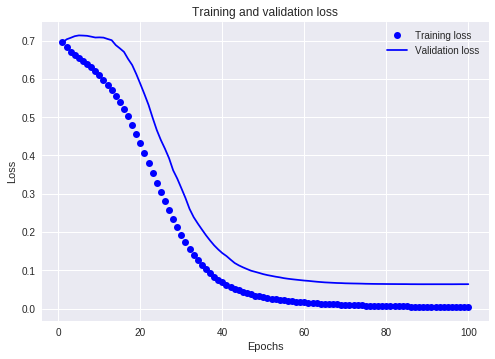

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

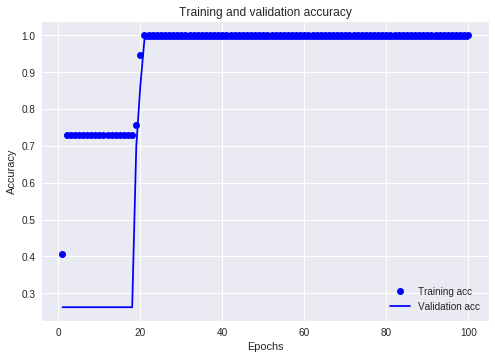

In [16]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# Review data
  
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

predictions = model.predict(prediction_data)
for index, data_item in enumerate(prediction_data):
    print("Prediction: " + str(round(float(predictions[index]),2)).ljust(12) , "Data: " + decode_review(data_item))

Prediction: 0.99         Data: <STRING CHANGE> <VALUE UP> . validationxml document browserxml arrangement entry entry entry @label <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Prediction: 0.0          Data: <NUMBER CHANGE> <VALUE UP> . validationxml document displayxml sheets sheet document root node base base node base dlitem dlitem dlitem member @X <PAD> <PAD> <PAD> <PAD> <PAD>
Prediction: 0.0          Data: <NUMBER CHANGE> <VALUE UP> . validationxml document displayxml sheets sheet document root node base base node base dlitem dlitem dlitem member @X <PAD> <PAD> <PAD> <PAD> <PAD>
Prediction: 0.0          Data: <NUMBER CHANGE> <VALUE UP> . validationxml document displayxml sheets sheet document root node base base node base dlitem dlitem dlitem member @X <PAD> <PAD> <PAD> <PAD> <PAD>


In [20]:
predictions = model.predict(prediction_data)
for index, data_item in enumerate(prediction_data):
    print(prediction_ids[index], "Prediction: " + str(round(float(predictions[index]),2)).ljust(5) , "Data: " + decode_review(data_item))


idw_atxt_c1110#0 Prediction: 0.99  Data: <STRING CHANGE> <VALUE UP> . validationxml document browserxml arrangement entry entry entry @label <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
idw_atxt_c1110#1 Prediction: 0.0   Data: <NUMBER CHANGE> <VALUE UP> . validationxml document displayxml sheets sheet document root node base base node base dlitem dlitem dlitem member @X <PAD> <PAD> <PAD> <PAD> <PAD>
idw_atxt_c1110#2 Prediction: 0.0   Data: <NUMBER CHANGE> <VALUE UP> . validationxml document displayxml sheets sheet document root node base base node base dlitem dlitem dlitem member @X <PAD> <PAD> <PAD> <PAD> <PAD>
idw_atxt_c1110#3 Prediction: 0.0   Data: <NUMBER CHANGE> <VALUE UP> . validationxml document displayxml sheets sheet document root node base base node base dlitem dlitem dlitem member @X <PAD> <PAD> <PAD> <PAD> <PAD>
